# Business Problem

In [34]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Dataset

In [2]:
df  = pd.read_csv('student_marks.csv')

In [3]:
df

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
...,...,...
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05


In [4]:
df.shape

(200, 2)

## Discover and visualize the data to gain insights

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [6]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


Text(0.5, 1.0, 'Scatter Plot of Students Study Hours vs Students marks')

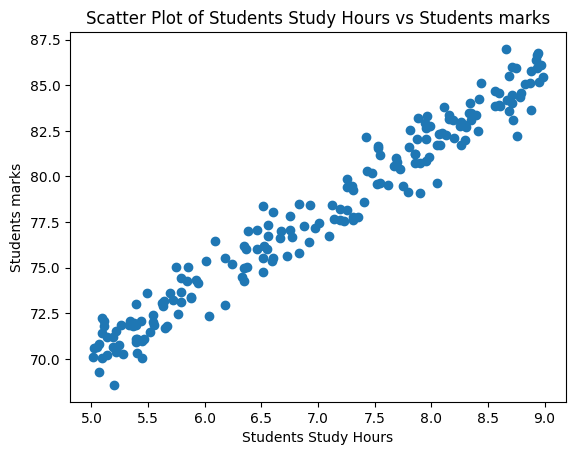

In [7]:
plt.scatter(df.study_hours, df.student_marks)
plt.xlabel("Students Study Hours")
plt.ylabel("Students marks")
plt.title("Scatter Plot of Students Study Hours vs Students marks")

## Prepare the data for Machine Learning algorithms 

In [8]:
# Data Cleaning

In [9]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [10]:
df.study_hours.mean()

6.9959487179487185

In [11]:
df2 = df.fillna(df.study_hours.mean())

In [12]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [13]:
# split dataset

In [14]:
X = df2.drop("student_marks", axis = "columns")
#X = df2.study_hours
y = df2.student_marks

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2) #, random_state=51

In [16]:
X_train

,study_hours
145,8.95
103,7.31
132,6.83
114,7.12
57,8.93
...,...
154,6.93
70,5.37
73,7.41
85,5.63


In [17]:
y_train

145    85.15
103    79.26
132    75.80
114    78.42
57     86.65
       ...  
154    78.45
70     71.80
73     78.61
85     72.87
68     69.27
Name: student_marks, Length: 160, dtype: float64

In [18]:
X_test

,study_hours
102,8.26
4,8.67
109,5.02
171,7.19
10,6.59
95,6.09
29,7.48
178,8.42
92,5.44
150,5.39


In [19]:
y_test

102    82.99
4      84.19
109    70.58
171    77.63
10     75.37
95     76.48
29     80.17
178    84.24
92     72.08
150    71.87
107    73.25
172    77.78
130    73.19
24     70.96
13     80.76
27     75.65
105    77.07
9      77.82
152    81.70
121    82.69
100    75.18
71     71.79
119    75.55
186    85.10
98     83.64
137    71.22
62     76.19
177    73.64
34     83.08
64     85.78
118    73.61
183    83.87
106    72.10
157    75.52
17     85.11
143    75.52
63     80.43
90     79.56
180    77.19
91     82.10
Name: student_marks, dtype: float64

# Select a model and train it

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
lr.coef_

array([3.95943542])

In [22]:
lr.intercept_

50.23495765666485

In [23]:
m = 3.93032419
c = 50.43877967508659
z  = m * 40 + c 
z

207.65174727508656

In [24]:
lr.predict([[40]])

c:\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([208.61237433])

In [25]:
y_pred  = lr.predict(X_test)
y_pred

array([82.9398942 , 84.56326272, 70.11132345, 78.7032983 , 76.32763705,
       74.34791934, 79.85153457, 83.57340387, 71.77428632, 71.57631455,
       72.88292824, 79.33680797, 72.56617341, 71.81388068, 81.51449745,
       76.88195801, 75.81291045, 76.96114672, 82.22719582, 83.13786597,
       74.94183466, 70.46767264, 76.36723141, 85.3551498 , 85.39474416,
       70.5864557 , 75.37737255, 73.16008872, 84.76123449, 85.39474416,
       72.76414518, 84.3256966 , 71.37834278, 74.70426853, 83.65259257,
       76.01088222, 80.80179907, 80.00991199, 77.83222251, 82.70232807])

In [26]:
pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ["study_hours", "student_marks_original","student_marks_predicted"])

,study_hours,student_marks_original,student_marks_predicted
0,8.26,82.99,82.939894
1,8.67,84.19,84.563263
2,5.02,70.58,70.111323
3,7.19,77.63,78.703298
4,6.59,75.37,76.327637
5,6.09,76.48,74.347919
6,7.48,80.17,79.851535
7,8.42,84.24,83.573404
8,5.44,72.08,71.774286
9,5.39,71.87,71.576315


## Fine-tune your model

In [27]:
lr.score(X_test,y_test)

0.9628427073405021

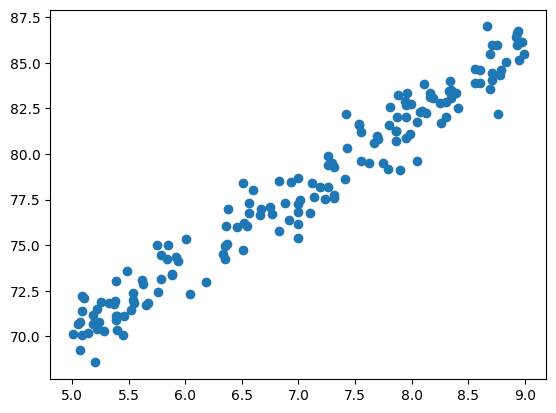

In [28]:
plt.scatter(X_train,y_train)  

In [29]:
lr.predict(X_train)

array([85.67190464, 79.17843055, 77.27790155, 78.42613782, 85.59271593,
       82.54395066, 85.75109335, 81.35612003, 70.5864557 , 76.20885399,
       71.57631455, 71.5367202 , 76.05047657, 79.61396845, 85.03839497,
       71.06158795, 80.12869505, 78.98045878, 81.43530874, 81.67287487,
       84.52366837, 76.64439189, 73.16008872, 81.39571439, 84.64245143,
       78.50532653, 84.72164014, 85.83028205, 75.37737255, 81.87084664,
       80.68301601, 77.93496478, 81.35612003, 79.17843055, 71.81388068,
       75.41696691, 70.07172909, 81.51449745, 76.20885399, 80.40585553,
       70.30929522, 77.93496478, 77.93496478, 71.61590891, 84.12772482,
       77.27790155, 79.6535628 , 75.49615562, 70.90321053, 82.10841276,
       85.63231028, 77.99059993, 72.17022987, 83.29624339, 78.98045878,
       70.78442747, 84.12772482, 72.20982422, 81.71246922, 77.93496478,
       79.1388362 , 82.90029985, 85.55312157, 71.85347503, 76.96114672,
       76.01088222, 82.26679018, 83.29624339, 80.6038273 , 76.16

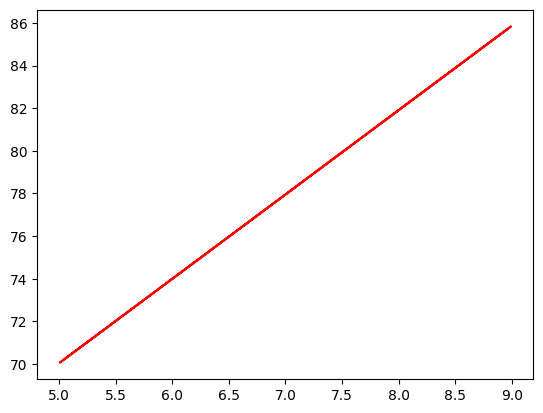

In [30]:
plt.plot(X_train, lr.predict(X_train), 'r-')

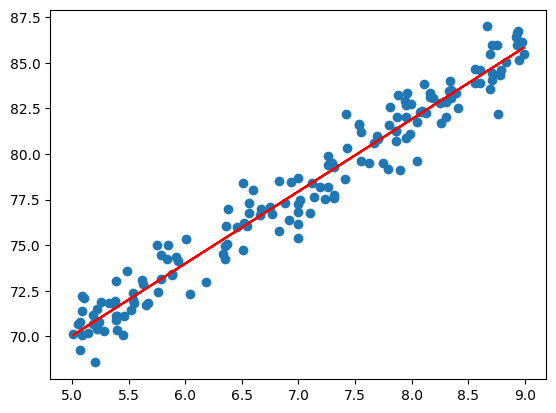

In [31]:
plt.scatter(X_train, y_train)
plt.plot(X_train, lr.predict(X_train), color = "r")

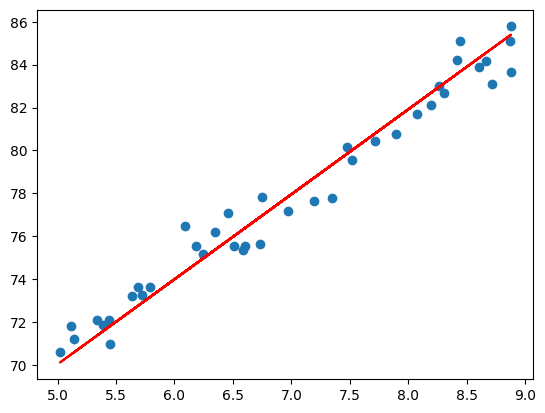

In [32]:
plt.scatter(X_test, y_test)
plt.plot(X_test, lr.predict(X_test), color = "r")

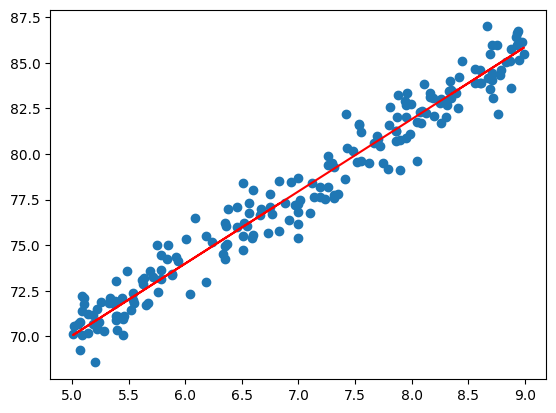

In [33]:
plt.scatter(X, y)
plt.plot(X, lr.predict(X), color = "r")